# Gensim Word2Vec Example
* https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

## Training a Word2Vec Model

In [34]:
from gensim.models import Word2Vec
from gensim.parsing import PorterStemmer
import string

In [35]:
# read the raw text
with open("the-last-question.txt") as file:
    text = file.read()

In [36]:
# preprocessing
depunctuator = str.maketrans('', '', string.punctuation)
sentences = text.lower().split(".")
sentences = [sentence.translate(depunctuator).split()\
             for sentence in sentences]

In [39]:
# train model
model = Word2Vec(sentences)

In [42]:
# save/load model
model.save("model.bin")
# model = Word2Vec.load("model.bin") 

## Visualising the Model

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [55]:
X = model[model.wv.vocab]
words = list(model.wv.vocab)

/Users/evan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [49]:
# reduce words to 2-dims using PCA
pca = PCA(n_components=2)
X_decomp = pca.fit_transform(X)

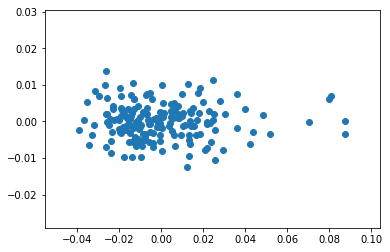

In [53]:
# plot
plt.scatter(X_decomp[:,0], X_decomp[:,1])

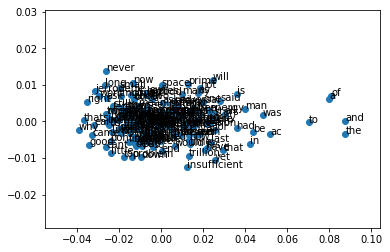

In [57]:
# plot and annotate each x-y with word
plt.scatter(X_decomp[:,0], X_decomp[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(X_decomp[i,0], X_decomp[i,1]))